# Derivation of numerical data

## Scope

* Finite number $N$ of data points $(x,y)$ are available: compute the derivative $\dfrac{dx}{dy}$


https://en.wikipedia.org/wiki/Numerical_differentiation

In [19]:
#setup
%load_ext autoreload
%matplotlib nbagg
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Introduction ...

### The data set : a synthetique data set

In [20]:
N = 100
xmin, xmax = 0., 4
x = np.linspace(xmin, xmax, N)
y = (x**2-3*x+2*np.sin(5*x))

<IPython.core.display.Javascript object>


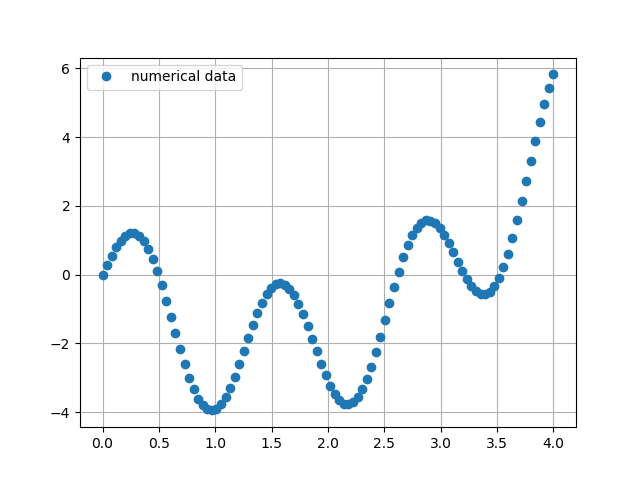

In [21]:
fig = plt.figure()
plt.plot(x,y,'o',label = "numerical data")
plt.legend()
plt.grid()

## The one point finite different formula

$\dfrac{df}{dx} = \dfrac{f(x_{i+1})-f(x_i)}{x_{i+1}-x_i}$ 

<IPython.core.display.Javascript object>


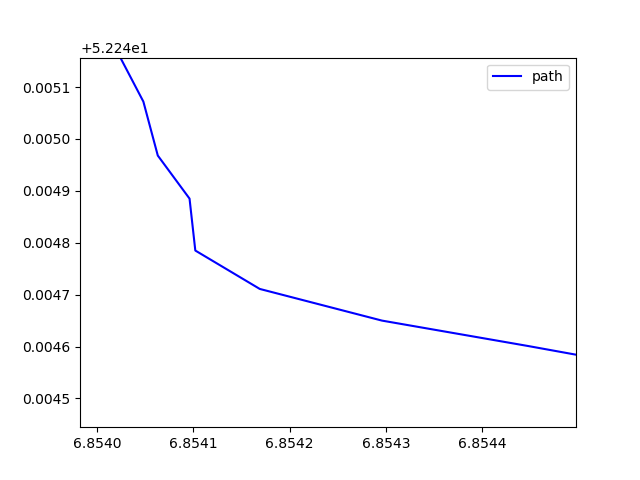

In [11]:
fig = plt.figure()
plt.plot(df.long,df.lat,'b',label = "path")
plt.legend()

In [16]:
df.size

3138